### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Display all rows and columns when printing DataFrames
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


### Load and Preview Data

In [2]:
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')

In [4]:
train.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,62,199,58,114,102,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,71,199,50,121,124,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,73,188,59,114,108,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,74,182,54,85,123,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,85,206,49,131,124,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [5]:
test.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,700000,45,4,100,4.3,6.8,6.2,25.5,0.84,123,70,64,209,55,135,111,Female,White,Highschool,Middle,Former,Employed,0,0,0
1,700001,35,1,87,3.5,4.6,9.0,28.6,0.88,120,74,59,159,47,83,145,Female,White,Highschool,Middle,Never,Unemployed,0,0,0
2,700002,45,1,61,7.6,6.8,7.0,28.5,0.94,112,71,75,173,43,99,184,Male,White,Highschool,Low,Never,Employed,0,0,0
3,700003,55,2,81,7.3,7.3,5.0,26.9,0.91,114,81,61,203,59,116,128,Male,White,Graduate,Middle,Former,Employed,0,0,0
4,700004,77,2,29,7.3,7.6,8.5,22.0,0.83,131,78,79,177,59,87,133,Male,White,Graduate,Low,Current,Unemployed,0,0,0


### Class Imbalance
We first check the distribution of our target variable diagnosed_diabetes

In [6]:
# Count of each class
train['diagnosed_diabetes'].value_counts(normalize=True) * 100

diagnosed_diabetes
1.0    62.329571
0.0    37.670429
Name: proportion, dtype: float64

- Class 1 (diabetes diagnosed): 62.33%
- Class 0 (no diabetes): 37.67%

Observation: The dataset is slightly imbalanced, but not extreme.

### Basic Summary Statistics

In [7]:
train.describe()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,349999.500000,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,75.440924,70.167749,186.818801,53.823214,102.905854,123.081850,0.149401,0.181990,0.030324,0.623296
std,202072.738554,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,6.825775,6.938722,16.730832,8.266545,19.022416,24.739397,0.356484,0.385837,0.171478,0.484560
min,0.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,42.000000,117.000000,21.000000,51.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,174999.750000,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,175.000000,48.000000,89.000000,106.000000,0.000000,0.000000,0.000000,0.000000
50%,349999.500000,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.000000,1.000000
75%,524999.250000,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,75.000000,199.000000,59.000000,116.000000,139.000000,0.000000,0.000000,0.000000,1.000000
max,699999.000000,89.000000,9.000000,747.000000,9.900000,9.900000,16.500000,38.400000,1.050000,163.000000,104.000000,101.000000,289.000000,90.000000,205.000000,290.000000,1.000000,1.000000,1.000000,1.000000


### Visualize Continuous Features

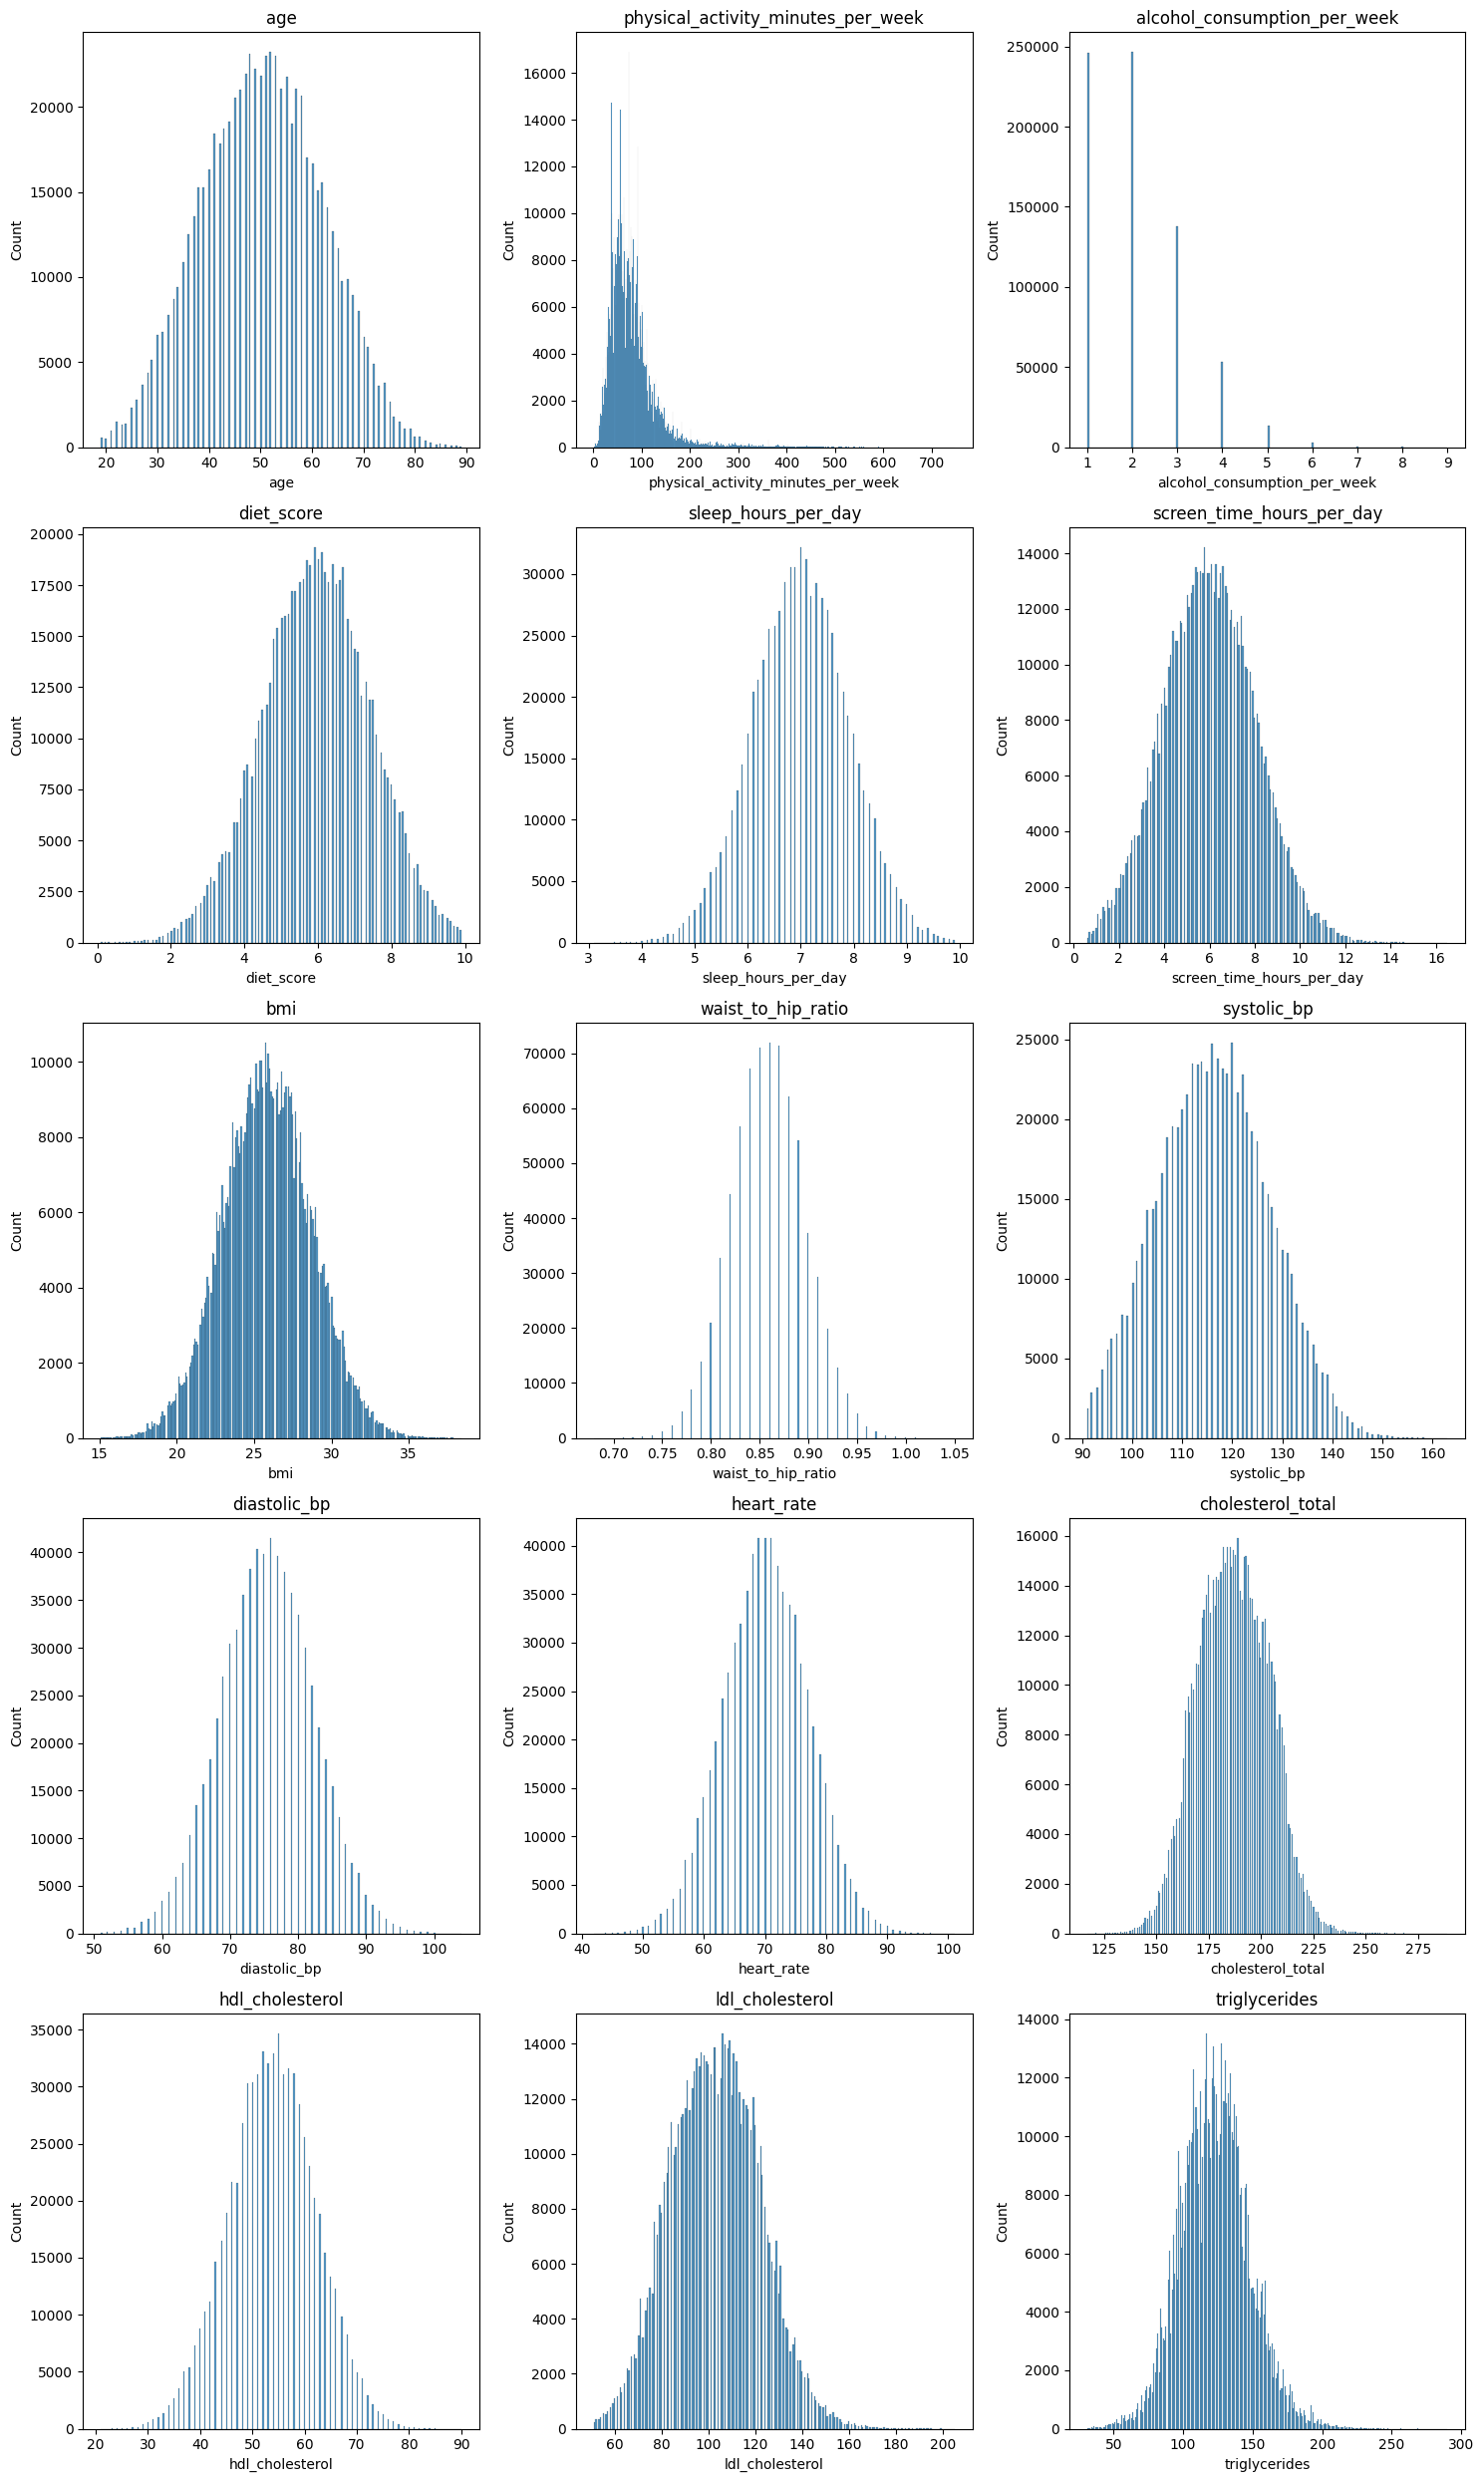

In [8]:
# List of continuous features to visualize
cols_to_plot = [
    "age",
    "physical_activity_minutes_per_week",
    "alcohol_consumption_per_week",
    "diet_score",
    "sleep_hours_per_day",
    "screen_time_hours_per_day",
    "bmi",
    "waist_to_hip_ratio",
    "systolic_bp",
    "diastolic_bp",
    "heart_rate",
    "cholesterol_total",
    "hdl_cholesterol",
    "ldl_cholesterol",
    "triglycerides"
]

# Keep only columns that exist in the dataset
cols_to_plot = [col for col in cols_to_plot if col in train.columns]

# Determine subplot grid size
n_cols = 3
n_plots = len(cols_to_plot)
n_rows = math.ceil(n_plots / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Plot histograms for each continuous feature
for i, col in enumerate(cols_to_plot):
    sns.histplot(train[col], ax=axes[i], kde=False)
    axes[i].set_title(col)

# Hide any extra axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


### Visualize Binary (0/1) Features

/var/folders/yw/4djwspfd71dd2kz47p89ghvm0000gn/T/ipykernel_81853/4010351319.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["No (0)", "Yes (1)"])
/var/folders/yw/4djwspfd71dd2kz47p89ghvm0000gn/T/ipykernel_81853/4010351319.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["No (0)", "Yes (1)"])
/var/folders/yw/4djwspfd71dd2kz47p89ghvm0000gn/T/ipykernel_81853/4010351319.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["No (0)", "Yes (1)"])
/var/folders/yw/4djwspfd71dd2kz47p89ghvm0000gn/T/ipykernel_81853/4010351319.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i]

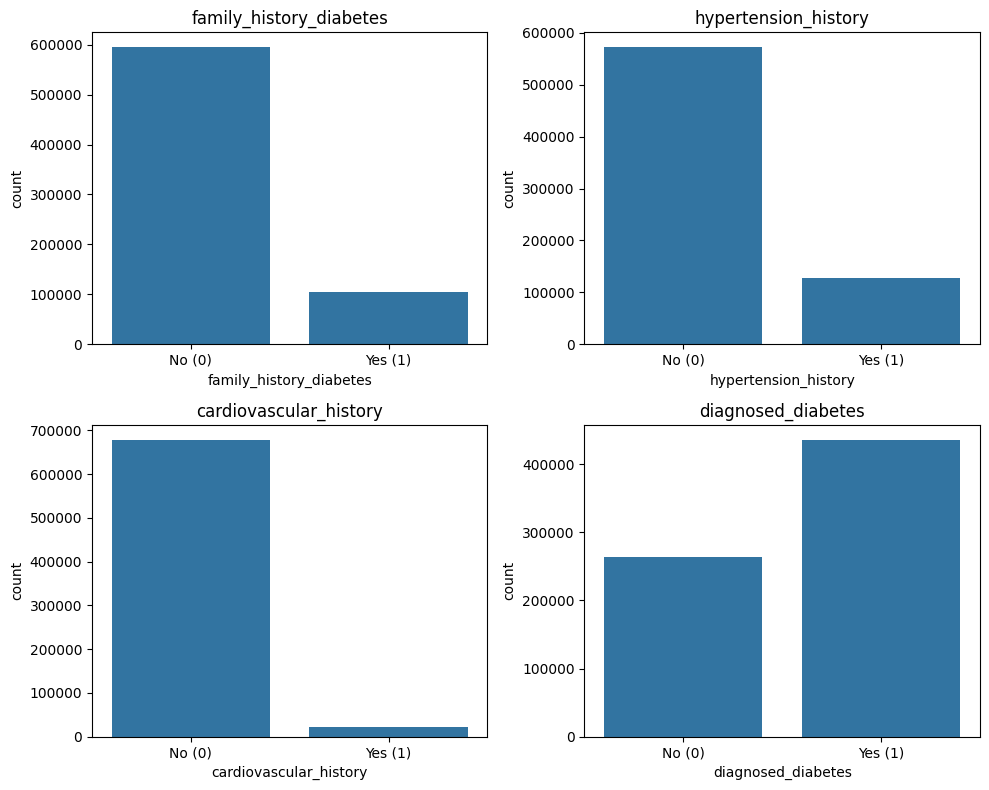

In [9]:
binary_cols = [
    "family_history_diabetes",
    "hypertension_history",
    "cardiovascular_history",
    "diagnosed_diabetes"
]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(binary_cols):
    sns.countplot(data=train, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels(["No (0)", "Yes (1)"])

plt.tight_layout()
plt.show()


### Visualize Categorical Features


--- gender ---
gender
Female    363237
Male      333085
Other       3678
Name: count, dtype: int64

--- ethnicity ---
ethnicity
White       386153
Hispanic    129984
Black       106301
Asian        60120
Other        17442
Name: count, dtype: int64

--- education_level ---
education_level
Highschool      344145
Graduate        261268
Postgraduate     79642
No formal        14945
Name: count, dtype: int64

--- income_level ---
income_level
Middle          290557
Lower-Middle    178570
Upper-Middle    127836
Low              85803
High             17234
Name: count, dtype: int64

--- smoking_status ---
smoking_status
Never      494448
Current    103363
Former     102189
Name: count, dtype: int64

--- employment_status ---
employment_status
Employed      516170
Retired       115735
Unemployed     49787
Student        18308
Name: count, dtype: int64


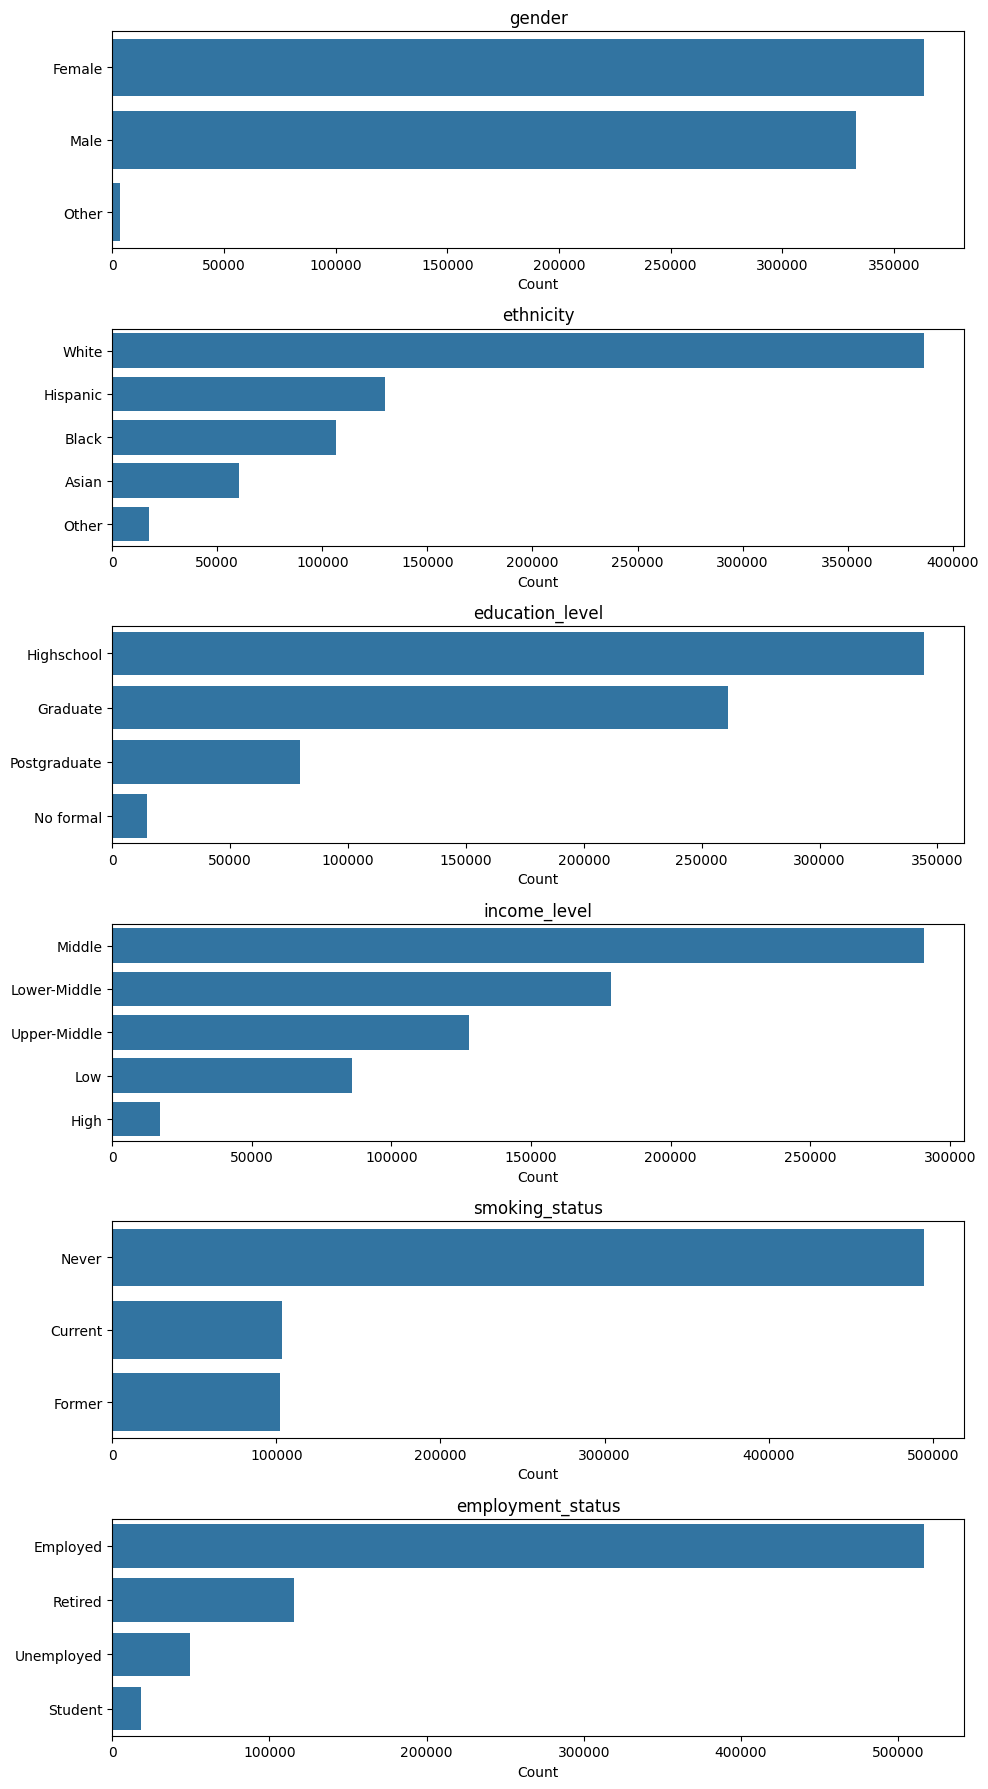

In [10]:
cat_cols = [
    'gender', 'ethnicity', 'education_level',
    'income_level', 'smoking_status', 'employment_status'
]

# Print counts for each category
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(train[col].value_counts())

# Horizontal bar plots
fig, axes = plt.subplots(len(cat_cols), 1, figsize=(10, 18))

for i, col in enumerate(cat_cols):
    sns.countplot(
        data=train,
        y=col,  # horizontal bars
        order=train[col].value_counts().index,
        ax=axes[i]
    )
    axes[i].set_title(col)
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()


### Bivariate EDA: Continuous Features Vs Target

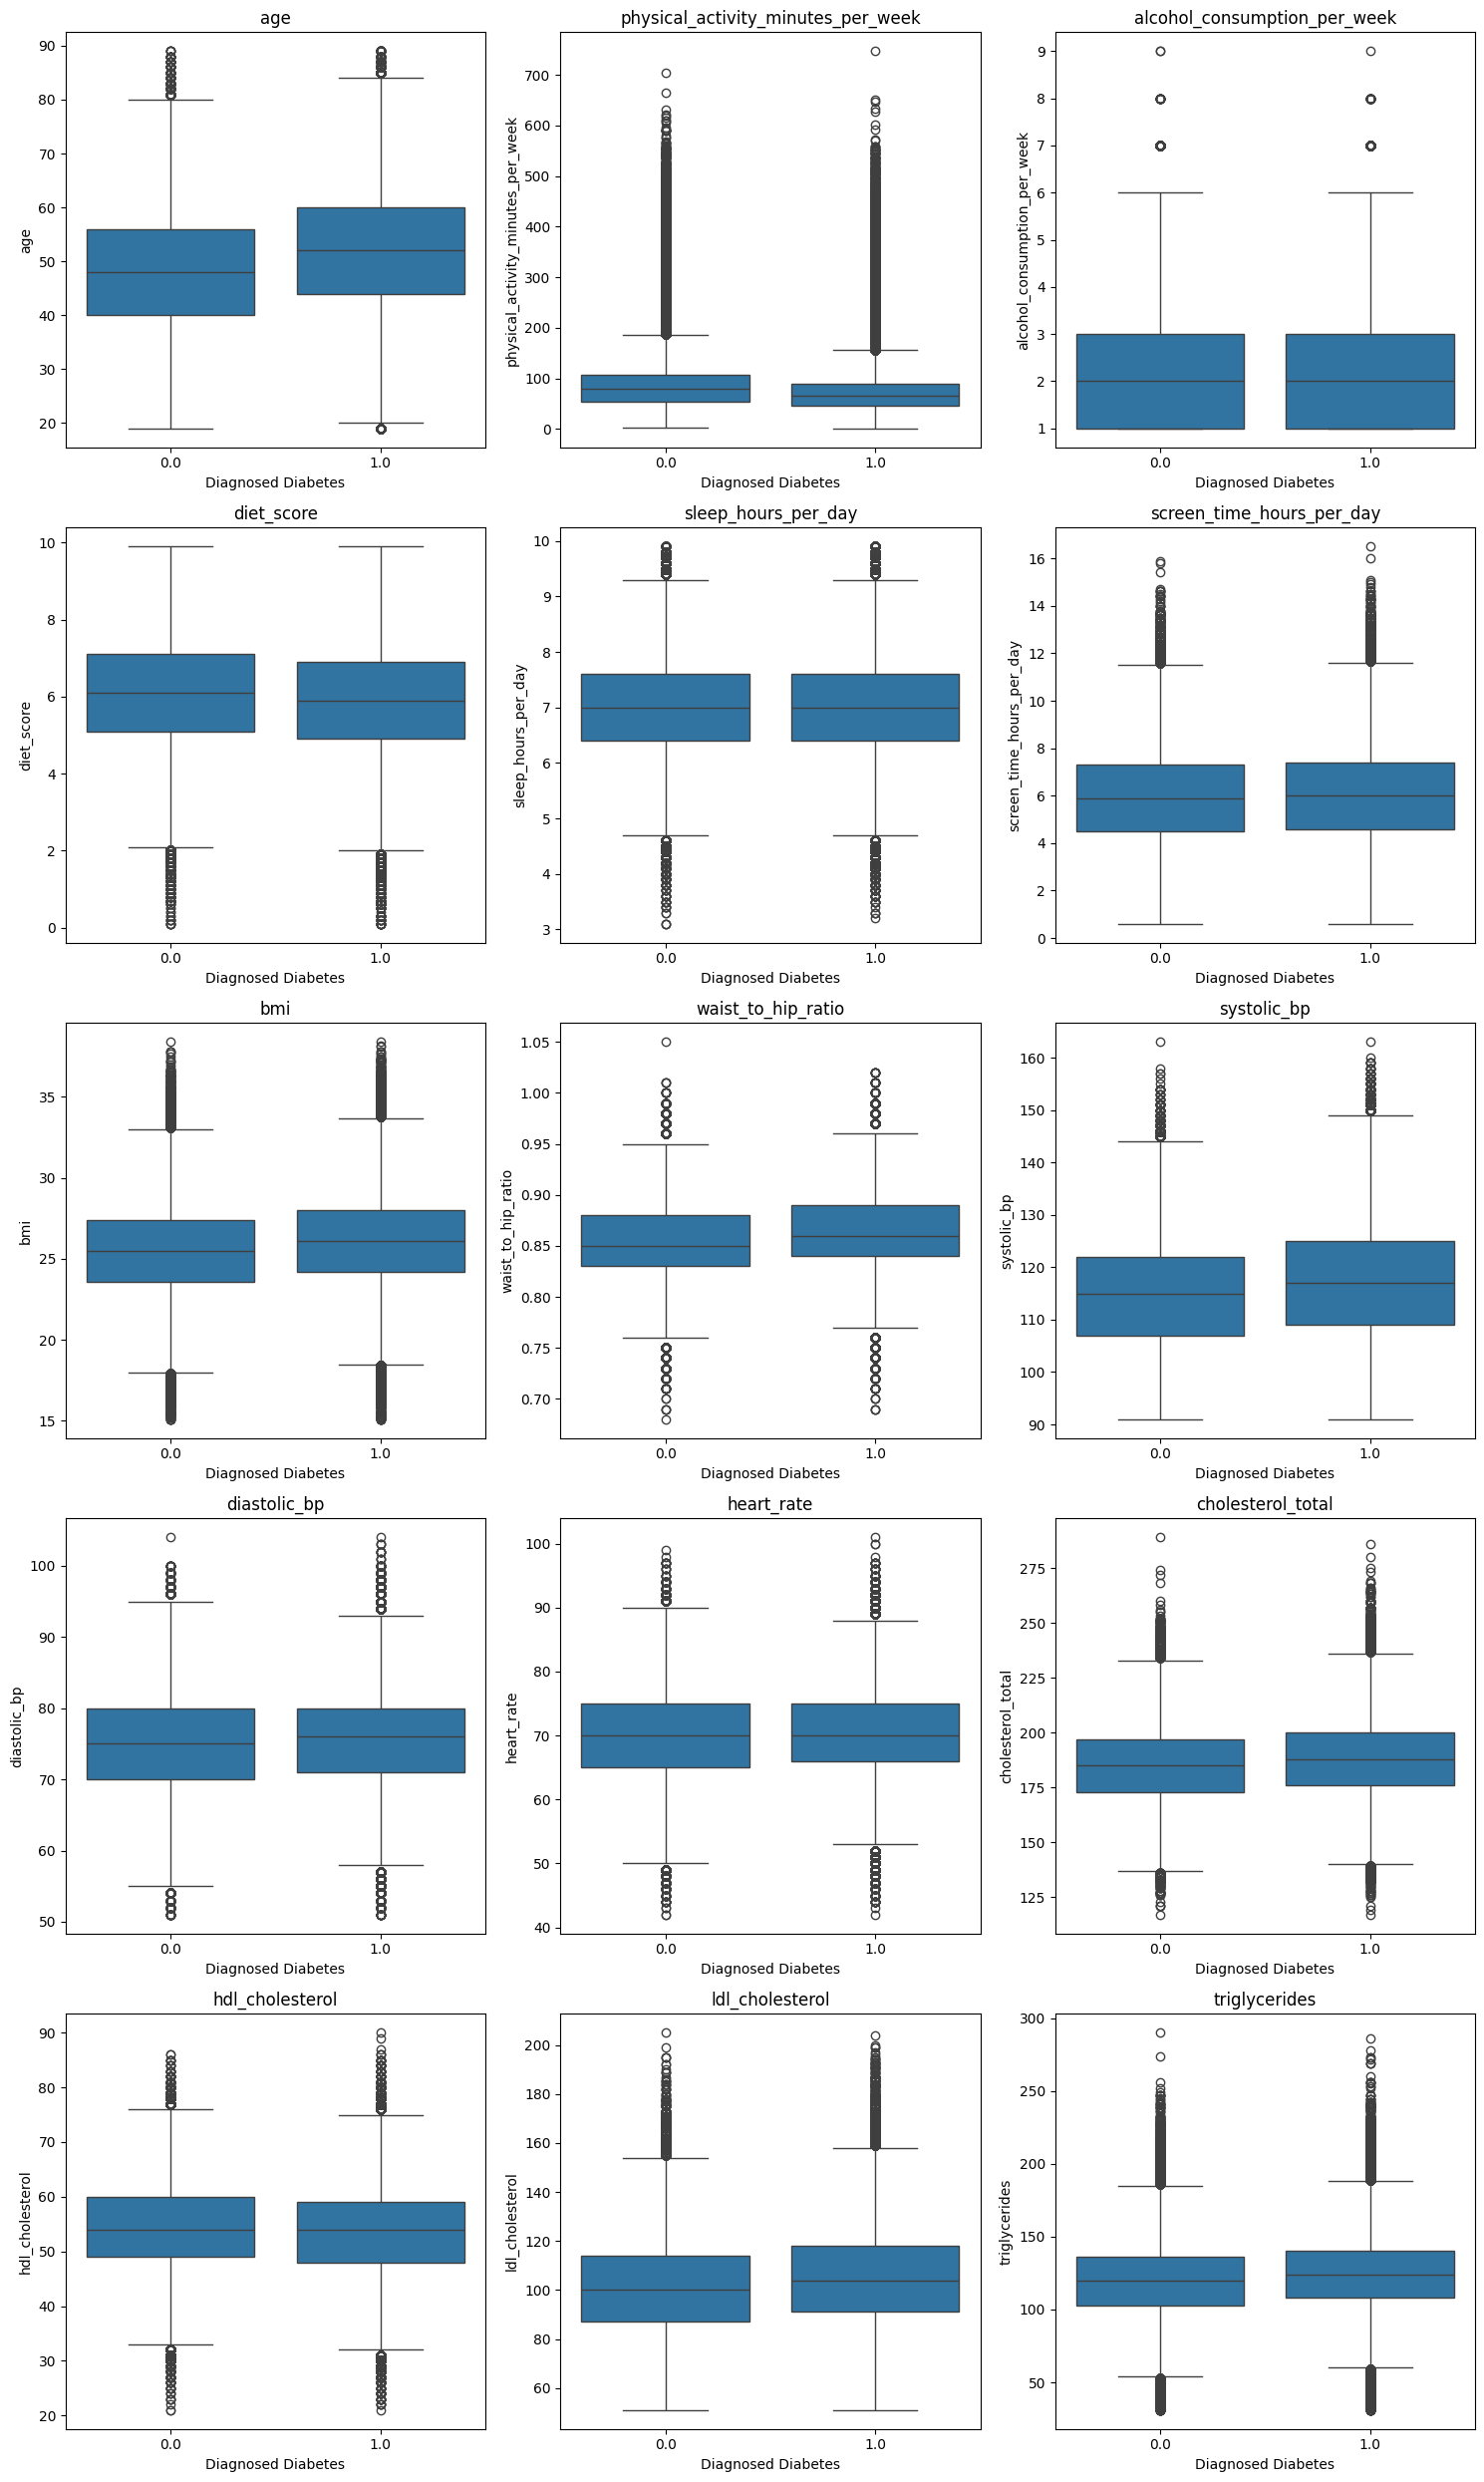

In [11]:
# Boxplots to compare distributions between diabetes classes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    sns.boxplot(data=train, x="diagnosed_diabetes", y=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel("Diagnosed Diabetes")
    axes[i].set_ylabel(col)

# Hide any extra axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


### Bivariate EDA: Categorical/Binary Features Vs Target

In [12]:
features = [
    'gender', 'ethnicity', 'education_level',
    'income_level', 'smoking_status', 'employment_status',
    "family_history_diabetes",
    "hypertension_history",
    "cardiovascular_history"
]

# Calculate mean target for each category
for feature in features:
    print(f"Mean diagnosed_diabetes by {feature}:")
    print(train.groupby(feature)["diagnosed_diabetes"].mean())
    print("\n")


Mean diagnosed_diabetes by gender:
gender
Female    0.622205
Male      0.624294
Other     0.640566
Name: diagnosed_diabetes, dtype: float64


Mean diagnosed_diabetes by ethnicity:
ethnicity
Asian       0.628493
Black       0.623879
Hispanic    0.616314
Other       0.635936
White       0.624105
Name: diagnosed_diabetes, dtype: float64


Mean diagnosed_diabetes by education_level:
education_level
Graduate        0.627008
Highschool      0.621462
No formal       0.636066
Postgraduate    0.616647
Name: diagnosed_diabetes, dtype: float64


Mean diagnosed_diabetes by income_level:
income_level
High            0.623593
Low             0.630328
Lower-Middle    0.626835
Middle          0.620291
Upper-Middle    0.620420
Name: diagnosed_diabetes, dtype: float64


Mean diagnosed_diabetes by smoking_status:
smoking_status
Current    0.623124
Former     0.625331
Never      0.622911
Name: diagnosed_diabetes, dtype: float64


Mean diagnosed_diabetes by employment_status:
employment_status
Employed    

Observation:
- Family history of diabetes shows a large difference (~0.58 → 0.87).
- Hypertension and cardiovascular history also show moderate differences.
- Demographic features (gender, ethnicity, education, income) show minimal differences individually.

### Correlation Analysis

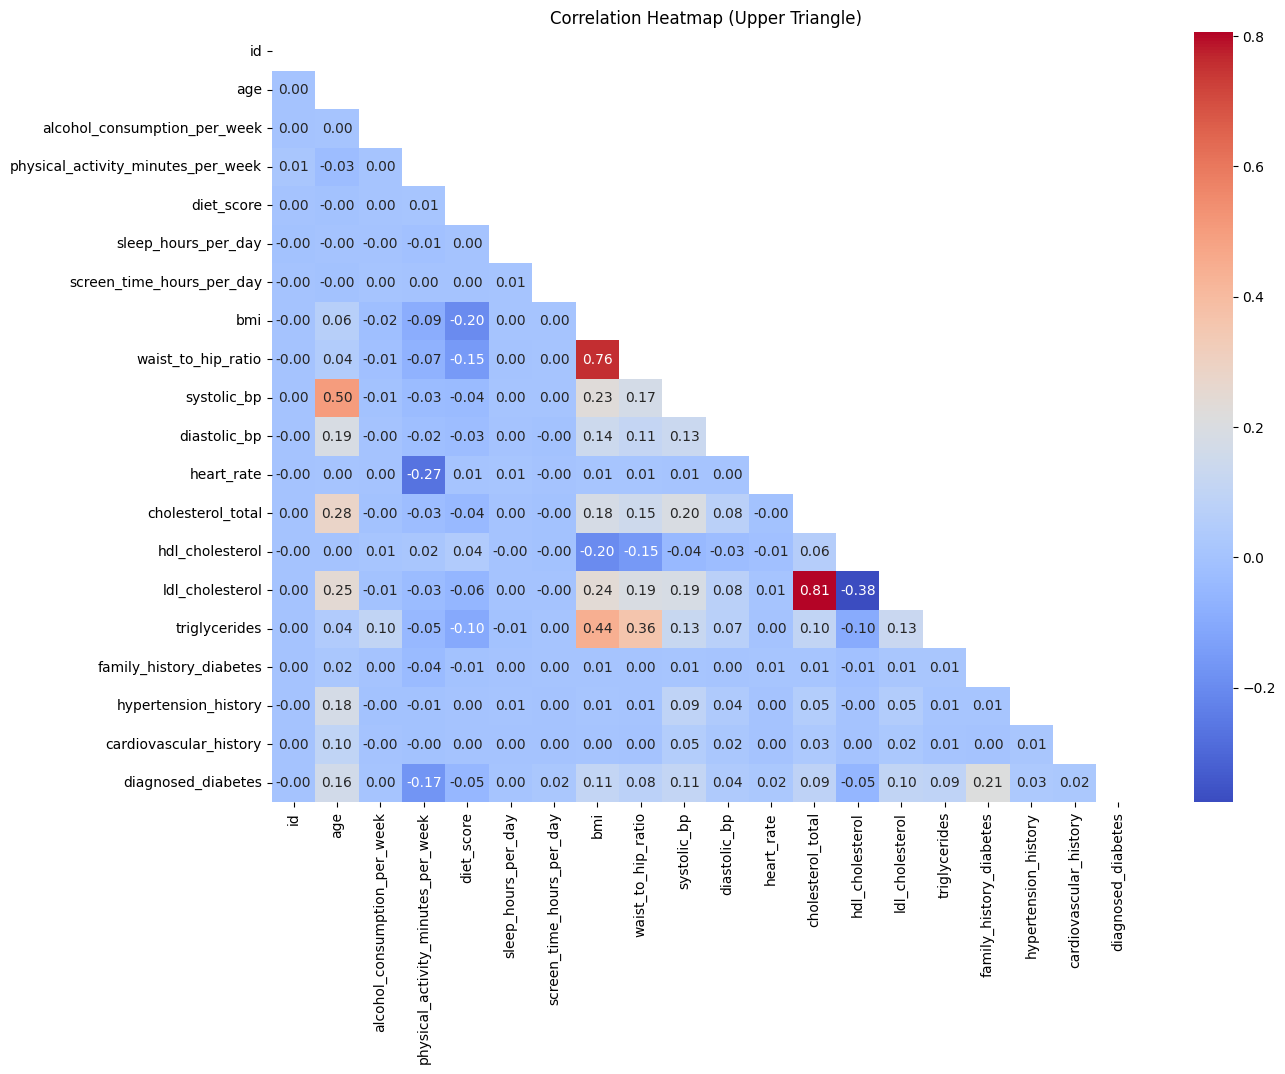

Correlations with diagnosed_diabetes:
diagnosed_diabetes                    1.000000
family_history_diabetes               0.211064
age                                   0.161162
systolic_bp                           0.107132
bmi                                   0.105580
ldl_cholesterol                       0.102771
triglycerides                         0.090635
cholesterol_total                     0.088112
waist_to_hip_ratio                    0.081050
diastolic_bp                          0.036271
hypertension_history                  0.029979
cardiovascular_history                0.024746
heart_rate                            0.023865
screen_time_hours_per_day             0.018213
sleep_hours_per_day                   0.003509
alcohol_consumption_per_week          0.002991
id                                   -0.000075
diet_score                           -0.050119
hdl_cholesterol                      -0.053231
physical_activity_minutes_per_week   -0.169789
Name: diagnosed_diabet

In [14]:
# Select numeric columns
numeric_cols = train.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap with upper triangle only
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Upper Triangle)")
plt.show()

# Correlation of all numeric features with target
target_corr = corr_matrix['diagnosed_diabetes'].sort_values(ascending=False)
print("Correlations with diagnosed_diabetes:")
print(target_corr)

In [17]:
# Select numeric columns
numeric_cols = train.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Convert correlation matrix to long-format DataFrame (pairs of features)
corr_df = (
    corr_matrix.where(~mask)  # keep only lower triangle (or upper with ~mask)
               .stack()      # convert to long format
               .reset_index()  # reset index
               .rename(columns={'level_0':'feature_1', 'level_1':'feature_2', 0:'correlation'})
)

# Add absolute correlation column
corr_df['abs_correlation'] = corr_df['correlation'].abs()

# Keep only the top 15 highest correlations
top_corr_df = corr_df.sort_values(by='abs_correlation', ascending=False).head(15)

# Drop the helper column if you don't need it
top_corr_df = top_corr_df.drop(columns='abs_correlation')

top_corr_df



,feature_1,feature_2,correlation
103,ldl_cholesterol,cholesterol_total,0.805909
35,waist_to_hip_ratio,bmi,0.757191
37,systolic_bp,age,0.502894
112,triglycerides,bmi,0.443837
104,ldl_cholesterol,hdl_cholesterol,-0.375791
113,triglycerides,waist_to_hip_ratio,0.359802
67,cholesterol_total,age,0.283155
58,heart_rate,physical_activity_minutes_per_week,-0.268426
92,ldl_cholesterol,age,0.245503
98,ldl_cholesterol,bmi,0.241057


Observation:
- Strongest continuous predictors: age, BMI, systolic BP, LDL, triglycerides, waist-to-hip ratio.
- Physical activity has a negative correlation (-0.17).
- Most other numeric features have weak correlations individually.

### Summary of EDA
1. Continuous features show modest correlations individually; age, BMI, and BP are slightly stronger predictors.
2. Binary health history features (family history, hypertension, cardiovascular history) are string predictors.
3. Categorical demographic features show weak effects individually.
4. Target variable is slighlty imbalanced (~62% positive).
5. Next steps:
- Feature interactions (age x BMI, BMI x physical activity)
- Outlier handling and feature transformation
- Multivariate modeling